<a href="https://colab.research.google.com/github/MahdiFaourr/MahdiFaourr/blob/main/breast_cancer_wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'machine_learning_certification' already exists and is not an empty directory.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           684 non-null    int64
 1   Clump Thickness              684 non-null    int64
 2   Uniformity of Cell Size      684 non-null    int64
 3   Uniformity of Cell Shape     684 non-null    int64
 4   Benign (2) or Malignant (4)  684 non-null    int64
dtypes: int64(5)
memory usage: 26.8 KB
The shape of our data is: (684, 5) .


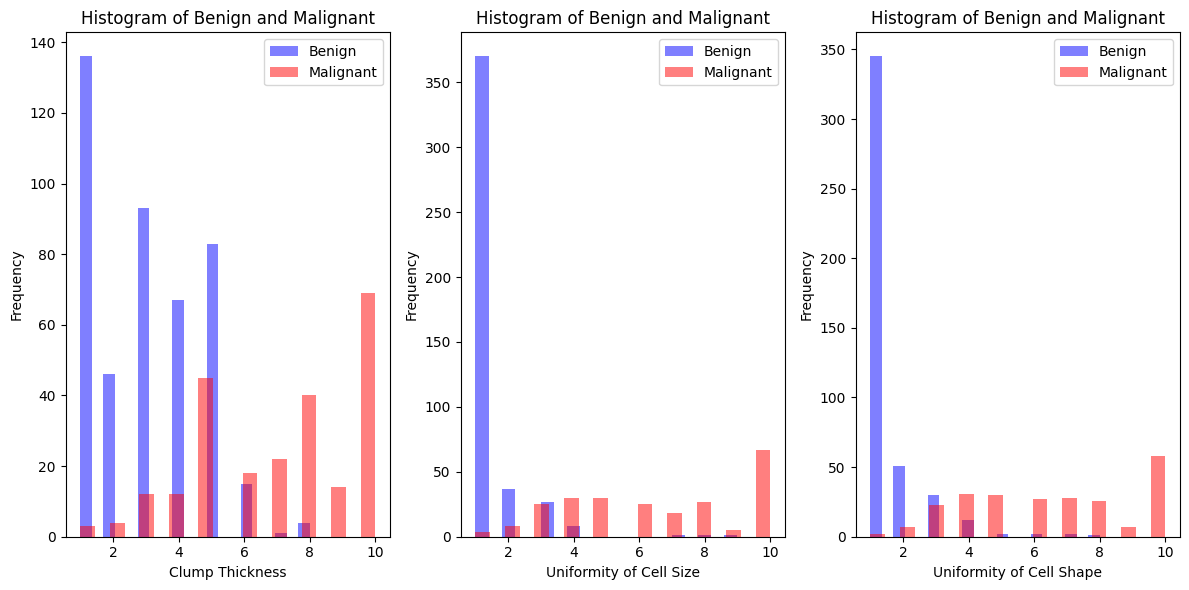

Training data: (720, 3) , (720,) .
---------------
Testing data: (81, 3) , (81,) .
LR scores for testing data:
accuracy % : 96.29629629629629 .
precision % : 97.05882352941177 .
recall % : 94.28571428571428 .
-----------------
LR scores for training data:
accuracy % : 94.72222222222221 .
precision % : 92.83489096573209 .
recall % : 95.2076677316294 .
----------------------------------------------------------
RF scores for testing data:
accuracy % : 98.76543209876543 .
precision % : 97.22222222222221 .
recall % : 100.0 .
-----------------
RF scores for training data:
accuracy % : 98.61111111111111 .
precision % : 98.75389408099689 .
recall % : 98.14241486068111 .
----------------------------------------------------------
ADAB scores for testing data:
accuracy % : 97.53086419753086 .
precision % : 94.5945945945946 .
recall % : 100.0 .
-----------------
ADAB scores for training data:
accuracy % : 95.97222222222223 .
precision % : 96.26168224299066 .
recall % : 94.78527607361963 .
--------

In [22]:
#clone the repo.
!git clone https://github.com/zaka-ai/machine_learning_certification
#Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.svm import SVC
import pickle
#Load in pandas dataframe.
data=pd.read_csv("machine_learning_certification/breast-cancer-wisconsin.csv")
data.head()
#Preprocesses and explores the data.
data.info()
print("The shape of our data is: "+str(data.shape)+" .")
encoder=LabelEncoder()
data['Benign (2) or Malignant (4)']=encoder.fit_transform(data['Benign (2) or Malignant (4)'])
data=data.drop('ID',axis=1)
data['Benign (2) or Malignant (4)'].value_counts()
data_Benign=data[(data['Benign (2) or Malignant (4)']==0)]
data_Malignant=data[data['Benign (2) or Malignant (4)']==1]
list_of_columns = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape']

# Create subplots for each column.
num_columns = len(list_of_columns)
fig, axes = plt.subplots(nrows=1, ncols=num_columns, figsize=(12,6))

for i, column in enumerate(list_of_columns):
    # Plot histograms for data_Benign and data_Malignant for each column.
    ax = axes[i]
    ax.hist(data_Benign[column], bins=20, alpha=0.5, label='Benign', color='blue')
    ax.hist(data_Malignant[column], bins=20, alpha=0.5, label='Malignant', color='red')

    # Customize the subplot
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of Benign and Malignant')
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined subplots
plt.show()
#Performs oversampling to address class imbalance.
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
over=RandomOverSampler(sampling_strategy=0.8)
x,y=over.fit_resample(x,y)
#Splits the data into training and testing sets.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
print("Training data:",x_train.shape,",",y_train.shape,".")
print("---------------")
print("Testing data:",x_test.shape,",",y_test.shape,".")
#Trains and evaluates multiple machine learning models.
models={"LR":LogisticRegression(),'RF':RandomForestClassifier(n_estimators=100),
        "ADAB":AdaBoostClassifier(n_estimators=100),'SV':SVC(kernel='rbf')}
for i in range(len(list(models))):
  model=list(models.values())[i]
  name=list(models.keys())[i]
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(str(name)+" scores for testing data:")
  print("accuracy % :",accuracy_score(y_test,y_pred)*100,".")
  print("precision % :",precision_score(y_test,y_pred)*100,".")
  print("recall % :",recall_score(y_test,y_pred)*100,".")
  print("-----------------")
  y_hat=model.predict(x_train)
  print(str(name)+" scores for training data:")
  print("accuracy % :",accuracy_score(y_hat,y_train)*100,".")
  print("precision % :",precision_score(y_hat,y_train)*100,".")
  print("recall % :",recall_score(y_hat,y_train)*100,".")
  print("----------------------------------------------------------")
#Performs cross-validation on AdaBoost and Random Forest models(the best two satisfying models ).
  adaboost=AdaBoostClassifier(n_estimators=100)
random_forest=RandomForestClassifier(n_estimators=100)
adaboost_validation=cross_validate(adaboost,x,y,cv=4,scoring=['accuracy','precision','recall','f1'])
random_forest_validation=cross_validate(random_forest,x,y,cv=4,scoring=['accuracy','precision','recall','f1'])
print("Validation results for adaboost_clssifier:")
print("accuracy % :",adaboost_validation.get("test_accuracy").mean()*100,".")
print("precision % :",adaboost_validation.get("test_precision").mean()*100,".")
print("recall % :",adaboost_validation.get("test_recall").mean()*100,".")
print("f1 % :",adaboost_validation.get("test_f1").mean()*100,".")
print("-----------------------------")
print("Validation results for random_forest_clssifier:")
print("accuracy % :",random_forest_validation.get("test_accuracy").mean()*100,".")
print("precision % :",random_forest_validation.get("test_precision").mean()*100,".")
print("recall % :",random_forest_validation.get("test_recall").mean()*100,".")
print("f1 % :",random_forest_validation.get("test_f1").mean()*100,".")
# Create the AdaBoostClassifier again,to get into hyperparameter tuning process.
adaboost = AdaBoostClassifier()

# Define the parameter grid to search through.
param_grid = {
    'n_estimators': [50,75,100,125,150],  # Number of weak learners.
    'learning_rate': [0.1, 0.5,0.7,0.4, 1.0]  # Learning rate.
}

# Create a GridSearchCV object.
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to your data.
grid_search.fit(x_train, y_train)

# Get the best parameters and best score.
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

# Use the best hyperparameters to create and evaluate the final model.
best_model = AdaBoostClassifier(**best_params)
best_model.fit(x_train, y_train)
test_accuracy = best_model.score(x_test, y_test)
print("Test Accuracy with Best Model:", test_accuracy)

# Save the model to a file.
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
